Fraud Detection - Baseline Model (Logistic Regression)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (classification_report, confusion_matrix, 
                             accuracy_score, precision_score, recall_score, 
                             f1_score, roc_auc_score, roc_curve)
import pickle
import time
import warnings
warnings.filterwarnings('ignore')

print("="*60)
print("BASELINE MODEL - LOGISTIC REGRESSION")
print("="*60)


BASELINE MODEL - LOGISTIC REGRESSION


LOAD DATA

In [2]:
print("\n📂 Loading training and validation data...")

# Load SMOTE balanced data (recommended)
X_train = pd.read_csv('../data/X_train_smote.csv')
y_train = pd.read_csv('../data/y_train_smote.csv').values.ravel()

# Load validation data (original imbalanced - for realistic evaluation)
X_val = pd.read_csv('../data/X_val.csv')
y_val = pd.read_csv('../data/y_val.csv').values.ravel()

print(f"✅ Data loaded successfully!")
print(f"   Training set: {X_train.shape[0]:,} samples")
print(f"   Validation set: {X_val.shape[0]:,} samples")
print(f"   Features: {X_train.shape[1]}")


📂 Loading training and validation data...
✅ Data loaded successfully!
   Training set: 396,554 samples
   Validation set: 42,559 samples
   Features: 30


BUILD BASELINE MODEL

In [3]:
print("\n" + "="*60)
print("TRAINING LOGISTIC REGRESSION MODEL")
print("="*60)

print("\n🔄 Training Logistic Regression...")
start_time = time.time()

# Initialize Logistic Regression
log_reg = LogisticRegression(
    random_state=42,
    max_iter=1000,
    solver='liblinear',
    C=1.0,
    class_weight=None  # Already balanced with SMOTE
)

# Train the model
log_reg.fit(X_train, y_train)

training_time = time.time() - start_time

print(f"✅ Training complete!")
print(f"   Training time: {training_time:.2f} seconds")
print(f"   Model converged: {log_reg.n_iter_}")


TRAINING LOGISTIC REGRESSION MODEL

🔄 Training Logistic Regression...
✅ Training complete!
   Training time: 5.17 seconds
   Model converged: [11]


MAKE PREDICTIONS

In [4]:
print("\n" + "="*60)
print("MAKING PREDICTIONS")
print("="*60)

# Predictions on training set
print("\n🔄 Predicting on training set...")
y_train_pred = log_reg.predict(X_train)
y_train_proba = log_reg.predict_proba(X_train)[:, 1]

# Predictions on validation set
print("🔄 Predicting on validation set...")
y_val_pred = log_reg.predict(X_val)
y_val_proba = log_reg.predict_proba(X_val)[:, 1]

print("✅ Predictions complete!")


MAKING PREDICTIONS

🔄 Predicting on training set...
🔄 Predicting on validation set...
✅ Predictions complete!


EVALUATE ON TRAINING SET

In [5]:
print("\n" + "="*60)
print("TRAINING SET PERFORMANCE")
print("="*60)

train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
train_roc_auc = roc_auc_score(y_train, y_train_proba)

print(f"""
📊 Training Metrics:
   Accuracy:  {train_accuracy:.4f}
   Precision: {train_precision:.4f}
   Recall:    {train_recall:.4f}
   F1-Score:  {train_f1:.4f}
   ROC-AUC:   {train_roc_auc:.4f}
""")


TRAINING SET PERFORMANCE

📊 Training Metrics:
   Accuracy:  0.9500
   Precision: 0.9722
   Recall:    0.9265
   F1-Score:  0.9488
   ROC-AUC:   0.9913



EVALUATE ON VALIDATION SET

In [6]:
print("="*60)
print("VALIDATION SET PERFORMANCE (MOST IMPORTANT)")
print("="*60)

val_accuracy = accuracy_score(y_val, y_val_pred)
val_precision = precision_score(y_val, y_val_pred)
val_recall = recall_score(y_val, y_val_pred)
val_f1 = f1_score(y_val, y_val_pred)
val_roc_auc = roc_auc_score(y_val, y_val_proba)

print(f"""
📊 Validation Metrics:
   Accuracy:  {val_accuracy:.4f}
   Precision: {val_precision:.4f} (% of predicted frauds that are actual frauds)
   Recall:    {val_recall:.4f} (% of actual frauds detected)
   F1-Score:  {val_f1:.4f}
   ROC-AUC:   {val_roc_auc:.4f}
""")


VALIDATION SET PERFORMANCE (MOST IMPORTANT)

📊 Validation Metrics:
   Accuracy:  0.9712
   Precision: 0.0491 (% of predicted frauds that are actual frauds)
   Recall:    0.8873 (% of actual frauds detected)
   F1-Score:  0.0931
   ROC-AUC:   0.9734



CONFUSION MATRIX - VALIDATION SET

In [7]:
print("\n" + "="*60)
print("CONFUSION MATRIX ANALYSIS")
print("="*60)

cm = confusion_matrix(y_val, y_val_pred)
print("\n📊 Confusion Matrix:")
print(f"                 Predicted")
print(f"               Legit  Fraud")
print(f"Actual Legit   {cm[0,0]:5d}  {cm[0,1]:5d}")
print(f"       Fraud   {cm[1,0]:5d}  {cm[1,1]:5d}")

# Calculate detailed metrics
tn, fp, fn, tp = cm.ravel()
print(f"""
📈 Detailed Breakdown:
   True Negatives (TN):  {tn:,} - Correctly identified legitimate transactions
   False Positives (FP): {fp:,} - Legitimate flagged as fraud (Type I Error)
   False Negatives (FN): {fn:,} - Fraud missed by model (Type II Error)
   True Positives (TP):  {tp:,} - Correctly detected fraud transactions
   
⚠️  False Positive Rate: {fp/(fp+tn)*100:.2f}%
✅  True Positive Rate (Recall): {tp/(tp+fn)*100:.2f}%
""")


CONFUSION MATRIX ANALYSIS

📊 Confusion Matrix:
                 Predicted
               Legit  Fraud
Actual Legit   41269   1219
       Fraud       8     63

📈 Detailed Breakdown:
   True Negatives (TN):  41,269 - Correctly identified legitimate transactions
   False Positives (FP): 1,219 - Legitimate flagged as fraud (Type I Error)
   False Negatives (FN): 8 - Fraud missed by model (Type II Error)
   True Positives (TP):  63 - Correctly detected fraud transactions

⚠️  False Positive Rate: 2.87%
✅  True Positive Rate (Recall): 88.73%



VISUALIZE CONFUSION MATRIX

✅ Saved: reports/baseline_confusion_matrix.png


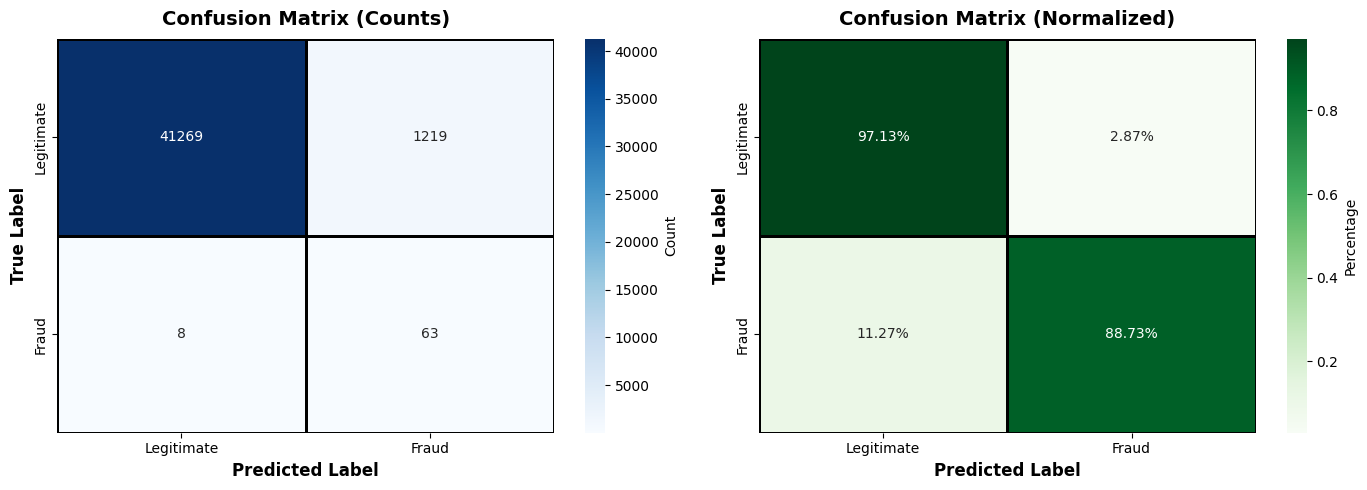

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Confusion Matrix - Counts
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Legitimate', 'Fraud'],
            yticklabels=['Legitimate', 'Fraud'],
            cbar_kws={'label': 'Count'},
            ax=axes[0], linewidths=2, linecolor='black')
axes[0].set_xlabel('Predicted Label', fontweight='bold', fontsize=12)
axes[0].set_ylabel('True Label', fontweight='bold', fontsize=12)
axes[0].set_title('Confusion Matrix (Counts)', fontweight='bold', fontsize=14, pad=10)

# Confusion Matrix - Normalized
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_normalized, annot=True, fmt='.2%', cmap='Greens',
            xticklabels=['Legitimate', 'Fraud'],
            yticklabels=['Legitimate', 'Fraud'],
            cbar_kws={'label': 'Percentage'},
            ax=axes[1], linewidths=2, linecolor='black')
axes[1].set_xlabel('Predicted Label', fontweight='bold', fontsize=12)
axes[1].set_ylabel('True Label', fontweight='bold', fontsize=12)
axes[1].set_title('Confusion Matrix (Normalized)', fontweight='bold', fontsize=14, pad=10)

plt.tight_layout()
plt.savefig('../reports/baseline_confusion_matrix.png', dpi=300, bbox_inches='tight')
print("✅ Saved: reports/baseline_confusion_matrix.png")
plt.show()

ROC CURVE


ROC CURVE ANALYSIS
✅ Saved: reports/baseline_roc_curve.png


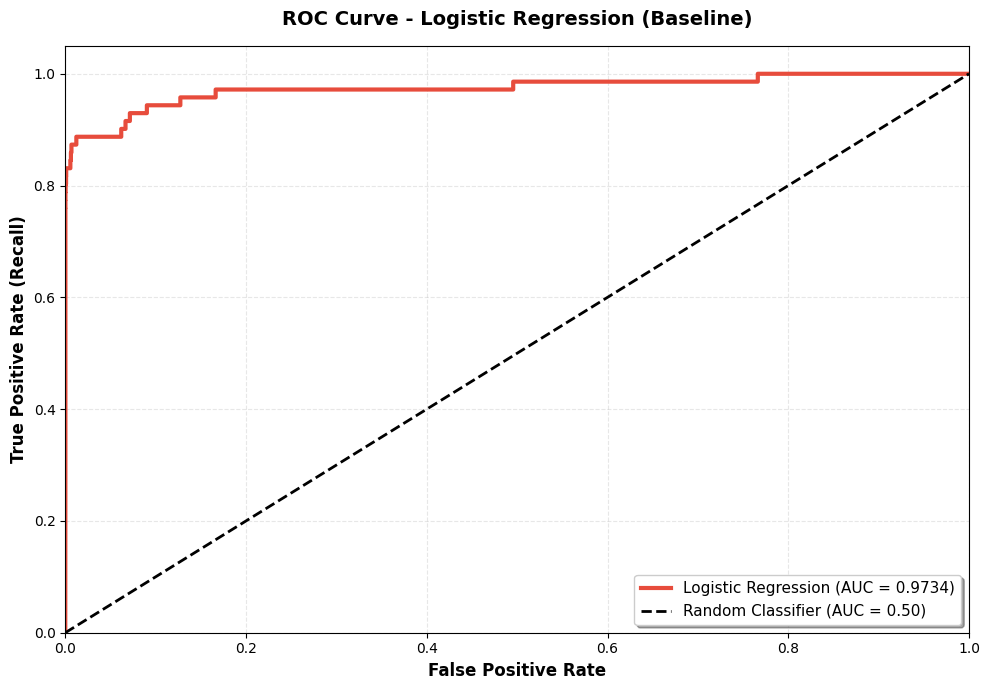

In [9]:
print("\n" + "="*60)
print("ROC CURVE ANALYSIS")
print("="*60)

fpr, tpr, thresholds = roc_curve(y_val, y_val_proba)

plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='#e74c3c', linewidth=3, 
         label=f'Logistic Regression (AUC = {val_roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--', linewidth=2, label='Random Classifier (AUC = 0.50)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontweight='bold', fontsize=12)
plt.ylabel('True Positive Rate (Recall)', fontweight='bold', fontsize=12)
plt.title('ROC Curve - Logistic Regression (Baseline)', fontweight='bold', fontsize=14, pad=15)
plt.legend(loc="lower right", fontsize=11, frameon=True, shadow=True)
plt.grid(True, alpha=0.3, linestyle='--')
plt.tight_layout()
plt.savefig('../reports/baseline_roc_curve.png', dpi=300, bbox_inches='tight')
print("✅ Saved: reports/baseline_roc_curve.png")
plt.show()


CLASSIFICATION REPORT

In [10]:
print("\n" + "="*60)
print("DETAILED CLASSIFICATION REPORT")
print("="*60)

print("\n📋 Validation Set Classification Report:")
print(classification_report(y_val, y_val_pred, 
                          target_names=['Legitimate', 'Fraud'],
                          digits=4))


DETAILED CLASSIFICATION REPORT

📋 Validation Set Classification Report:
              precision    recall  f1-score   support

  Legitimate     0.9998    0.9713    0.9854     42488
       Fraud     0.0491    0.8873    0.0931        71

    accuracy                         0.9712     42559
   macro avg     0.5245    0.9293    0.5392     42559
weighted avg     0.9982    0.9712    0.9839     42559



FEATURE IMPORTANCE ANALYSIS


FEATURE IMPORTANCE ANALYSIS

📊 Top 15 Most Important Features:
      Feature  Coefficient
Amount_Scaled     2.380024
          V14    -1.722747
          V12    -1.283153
          V10    -1.252689
          V20    -1.225073
          V17    -1.175048
           V5     0.905531
           V1     0.905338
          V28     0.891378
          V23     0.886914
           V4     0.883867
          V22     0.757485
          V16    -0.698810
          V11     0.639410
           V6    -0.635356
✅ Saved: reports/baseline_feature_importance.png


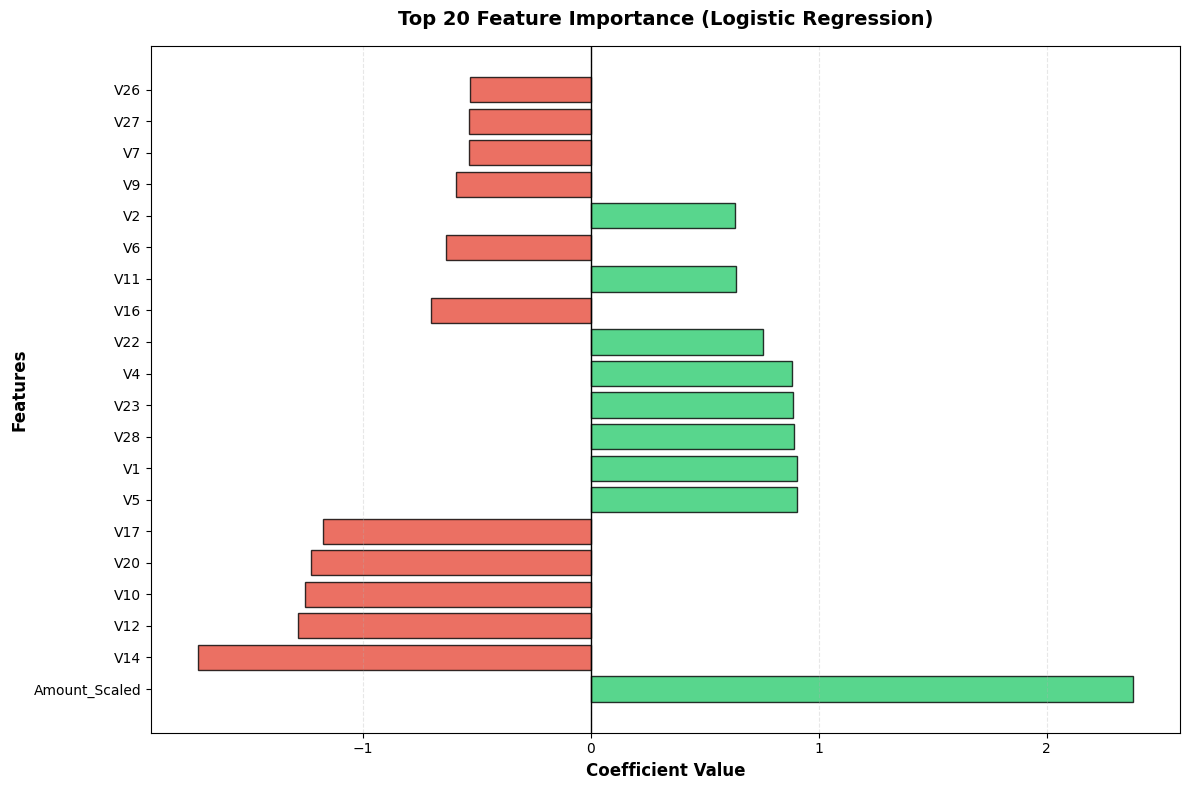

In [11]:
print("\n" + "="*60)
print("FEATURE IMPORTANCE ANALYSIS")
print("="*60)

# Get feature coefficients
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': log_reg.coef_[0]
})

# Sort by absolute coefficient value
feature_importance['Abs_Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values('Abs_Coefficient', ascending=False)

print("\n📊 Top 15 Most Important Features:")
print(feature_importance.head(15)[['Feature', 'Coefficient']].to_string(index=False))

# Visualize top 20 features
top_features = feature_importance.head(20)

plt.figure(figsize=(12, 8))
colors = ['#e74c3c' if x < 0 else '#2ecc71' for x in top_features['Coefficient']]
plt.barh(range(len(top_features)), top_features['Coefficient'], color=colors, alpha=0.8, edgecolor='black')
plt.yticks(range(len(top_features)), top_features['Feature'])
plt.xlabel('Coefficient Value', fontweight='bold', fontsize=12)
plt.ylabel('Features', fontweight='bold', fontsize=12)
plt.title('Top 20 Feature Importance (Logistic Regression)', fontweight='bold', fontsize=14, pad=15)
plt.axvline(x=0, color='black', linestyle='-', linewidth=1)
plt.grid(True, alpha=0.3, axis='x', linestyle='--')
plt.tight_layout()
plt.savefig('../reports/baseline_feature_importance.png', dpi=300, bbox_inches='tight')
print("✅ Saved: reports/baseline_feature_importance.png")
plt.show()

SAVE MODEL AND RESULTS

In [12]:
print("\n" + "="*60)
print("SAVING MODEL AND RESULTS")
print("="*60)

# Save the trained model
with open('../models/logistic_regression_baseline.pkl', 'wb') as f:
    pickle.dump(log_reg, f)
print("✅ Saved model: models/logistic_regression_baseline.pkl")

# Save feature importance
feature_importance.to_csv('../reports/baseline_feature_importance.csv', index=False)
print("✅ Saved feature importance: reports/baseline_feature_importance.csv")

# Save performance metrics
metrics_data = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC', 'Training Time (s)'],
    'Training Set': [train_accuracy, train_precision, train_recall, train_f1, train_roc_auc, training_time],
    'Validation Set': [val_accuracy, val_precision, val_recall, val_f1, val_roc_auc, '-']
}
metrics_df = pd.DataFrame(metrics_data)
metrics_df.to_csv('../reports/baseline_metrics.csv', index=False)
print("✅ Saved metrics: reports/baseline_metrics.csv")


SAVING MODEL AND RESULTS
✅ Saved model: models/logistic_regression_baseline.pkl
✅ Saved feature importance: reports/baseline_feature_importance.csv
✅ Saved metrics: reports/baseline_metrics.csv


FINAL SUMMARY

In [13]:
print("\n" + "="*60)
print("BASELINE MODEL TRAINING COMPLETE!")
print("="*60)

print(f"""
✅ Logistic Regression baseline model trained successfully!

🎯 Key Performance Metrics (Validation Set):
   Accuracy:  {val_accuracy:.4f}
   Precision: {val_precision:.4f} ⭐
   Recall:    {val_recall:.4f} ⭐
   F1-Score:  {val_f1:.4f}
   ROC-AUC:   {val_roc_auc:.4f}

📊 Confusion Matrix Summary:
   True Positives (Fraud Detected):  {tp:,}
   False Negatives (Fraud Missed):   {fn:,}
   False Positives (Wrong Alerts):   {fp:,}
   True Negatives (Correct Legit):   {tn:,}

💡 Interpretation:
   ✓ Recall ({val_recall:.2%}): Model detects {val_recall:.2%} of all fraud cases
   ✓ Precision ({val_precision:.2%}): {val_precision:.2%} of fraud predictions are correct
   ✓ ROC-AUC ({val_roc_auc:.4f}): Excellent discrimination ability

📁 Saved Files:
   ✓ models/logistic_regression_baseline.pkl
   ✓ reports/baseline_confusion_matrix.png
   ✓ reports/baseline_roc_curve.png
   ✓ reports/baseline_feature_importance.png
   ✓ reports/baseline_feature_importance.csv
   ✓ reports/baseline_metrics.csv

🚀 Next Steps:
   1. Train advanced models (Random Forest, SVM, XGBoost)
   2. Compare performance with baseline
   3. Select best model for deployment

⚠️  This is your BASELINE - all advanced models should beat these scores!
""")

print("\n🎉 Task 5 Complete!")


BASELINE MODEL TRAINING COMPLETE!

✅ Logistic Regression baseline model trained successfully!

🎯 Key Performance Metrics (Validation Set):
   Accuracy:  0.9712
   Precision: 0.0491 ⭐
   Recall:    0.8873 ⭐
   F1-Score:  0.0931
   ROC-AUC:   0.9734

📊 Confusion Matrix Summary:
   True Positives (Fraud Detected):  63
   False Negatives (Fraud Missed):   8
   False Positives (Wrong Alerts):   1,219
   True Negatives (Correct Legit):   41,269

💡 Interpretation:
   ✓ Recall (88.73%): Model detects 88.73% of all fraud cases
   ✓ Precision (4.91%): 4.91% of fraud predictions are correct
   ✓ ROC-AUC (0.9734): Excellent discrimination ability

📁 Saved Files:
   ✓ models/logistic_regression_baseline.pkl
   ✓ reports/baseline_confusion_matrix.png
   ✓ reports/baseline_roc_curve.png
   ✓ reports/baseline_feature_importance.png
   ✓ reports/baseline_feature_importance.csv
   ✓ reports/baseline_metrics.csv

🚀 Next Steps:
   1. Train advanced models (Random Forest, SVM, XGBoost)
   2. Compare perfo